# Downloadsing GridSat data for MCS-event days 

MCS dataset was obtained courtesy of Xingchao Chen, described in 

Chen, X., Leung, L. R., Feng, Z., & Yang, Q. (2023). Environmental controls on MCS lifetime rainfall over tropical oceans. Geophysical Research Letters, 50, e2023GL103267. https://doi.org/10.1029/2023GL103267

In [48]:
import pandas as pd
# import geopandas as gp
import matplotlib.pyplot as plt
import xarray as xr 
import numpy as np

In [3]:
# small dataset, one row per MCS
MCSs = xr.open_dataset('/Users/bmapes/Box/EvolutionaryConvection/MCS_Environment.nc')
MCSs

<xarray.Dataset>
Dimensions:       (n: 197152)
Dimensions without coordinates: n
Data variables: (12/38)
    Year_init     (n) float64 ...
    Month_init    (n) float64 ...
    Day_init      (n) float64 ...
    Hour_init     (n) float64 ...
    Lon_init      (n) float64 ...
    Lat_init      (n) float64 ...
    ...            ...
    U10           (n) float64 ...
    V10           (n) float64 ...
    TCWV          (n) float64 ...
    CAPE          (n) float64 ...
    LFC           (n) float64 ...
    LCL           (n) float64 ...

In [63]:
# make all vars coordinates for sel() operations - silly, no need
#for var in list(MCSs.keys()):
#    MCSs = MCSs.assign_coords({var: MCSs[var]})

# Pandas instead of xarray

In [104]:
#MCSs = pd.read_excel('/Users/bmapes/Box/EvolutionaryConvection/MCS_Environment.xlsx')
#MCSs.describe(include = 'all')

In [105]:
#MCSs[MCSs.Year_init > 2018]

# Open the full dataset with profiles 
## for 223 hours -23 to 199 

In [4]:
ds = xr.open_dataset('~/Downloads/MCS_Environment_profile.nc')
ds

<xarray.Dataset>
Dimensions:               (n: 197152, pressure: 27, time: 223)
Coordinates:
  * pressure              (pressure) float64 1e+03 975.0 950.0 ... 125.0 100.0
  * time                  (time) float64 -23.0 -22.0 -21.0 ... 197.0 198.0 199.0
Dimensions without coordinates: n
Data variables: (12/22)
    Year_init             (n) float64 ...
    Month_init            (n) float64 ...
    Day_init              (n) float64 ...
    Hour_init             (n) float64 ...
    Lon_init              (n) float64 ...
    Lat_init              (n) float64 ...
    ...                    ...
    T_profile             (n, time, pressure) float64 ...
    Q_profile             (n, time, pressure) float64 ...
    U_profile             (n, time, pressure) float64 ...
    V_profile             (n, time, pressure) float64 ...
    Omega_profile         (n, time, pressure) float64 ...
    Geopotential_profile  (n, time, pressure) float64 ...

# Amazon and SPCZ 20 degree boxes to compare

In [64]:
Amz_23Z = (ds.Lon_init < -45) & (ds.Lon_init > -65) & \
             (ds.Lat_init > -20) & (ds.Lat_init < 0) & \
             (ds.Hour_init== 23)  # & (ds.TotalRain < 2e7) #&\
#             (ds.Year_init >=2014) & (ds.Year_init <=2018)

In [30]:
SPCZ_9Z = (ds.Lon_init < -140) & (ds.Lon_init > -160) & \
             (ds.Lat_init > -20) & (ds.Lat_init < 0) & \
             (ds.Hour_init== 9) # & (ds.TotalRain < 2e7) #&\
#             (ds.Year_init >=2014) & (ds.Year_init <=2018)

In [309]:
Amaz_Tprof = ds.T_profile[ Amz_23Z ][:,0:48,:]
SPCZ_Tprof = ds.T_profile[ SPCZ_9Z ][:,0:48,:]

(array([57., 41., 35., 42., 30., 28., 17., 23., 44., 69.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

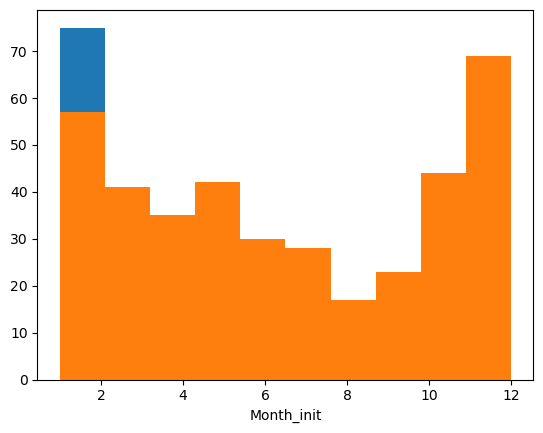

In [310]:
ds.Month_init[Amz_23Z].plot.hist()
ds.Month_init[SPCZ_9Z].plot.hist()

(array([121.,  57.,  25.,  14.,   9.,   8.,   3.,   1.,   1.,   3.,   1.,
          2.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([  372591.48368835,  2066491.51061766,  3760391.53754697,
         5454291.56447628,  7148191.59140559,  8842091.6183349 ,
        10535991.6452642 , 12229891.67219351, 13923791.69912282,
        15617691.72605213, 17311591.75298144, 19005491.77991075,
        20699391.80684005, 22393291.83376936, 24087191.86069867,
        25781091.88762798, 27474991.91455729, 29168891.9414866 ,
        30862791.9684159 , 32556691.99534522, 34250592.02227452]),
 <BarContainer object of 20 artists>)

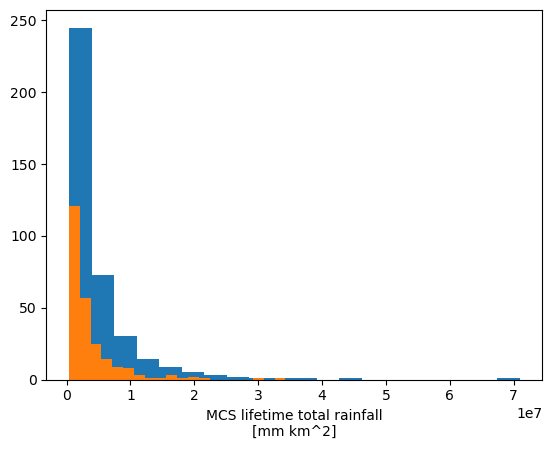

In [311]:
ds.TotalRain[SPCZ_9Z].plot.hist(bins=20)
ds.TotalRain[Amz_23Z].plot.hist(bins=20)

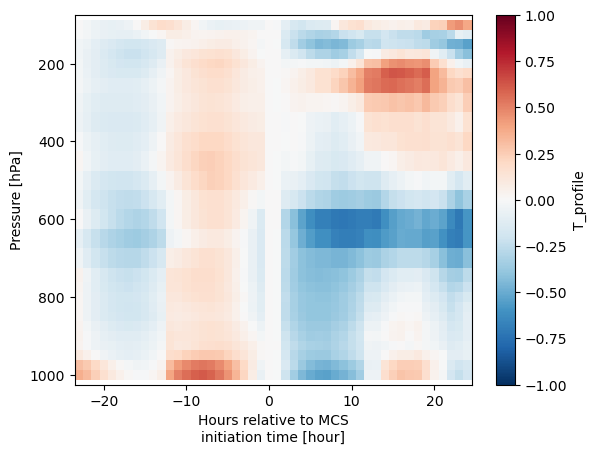

In [312]:
(SPCZ_Tprof[:,0:48,:] - SPCZ_Tprof[:,23,:] ).mean(dim='n').transpose().\
    plot(ylim=[1025,75],  vmin=-1, vmax=1, cmap='RdBu_r')

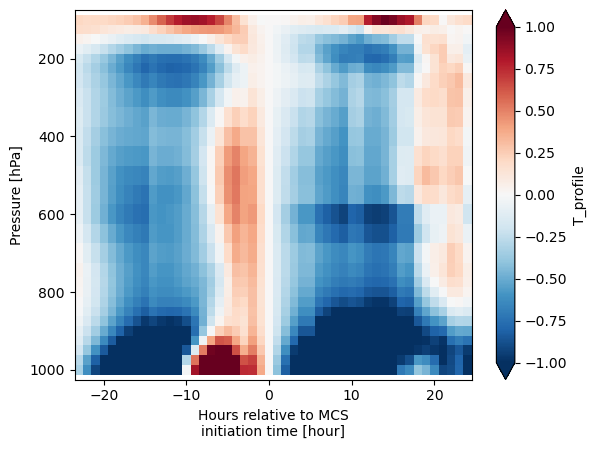

In [314]:
(Amaz_Tprof[:,0:48,:] - Amaz_Tprof[:,23,:] ).mean(dim='n').transpose().\
        plot(ylim=[1025,75], vmin=-1, vmax=1, cmap='RdBu_r')

Text(0.5, 1.0, '247 Amazon 23Z sunset init, minus day before')

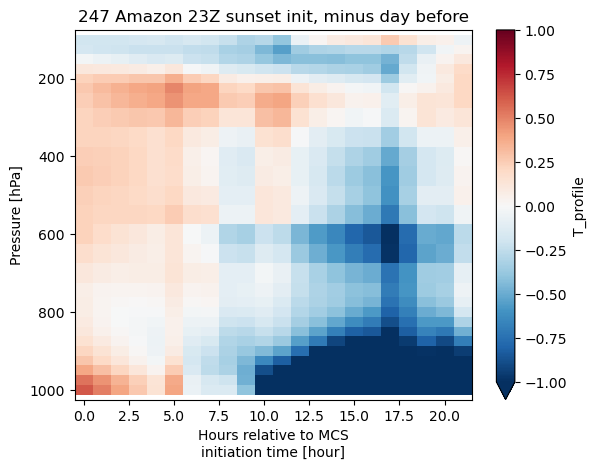

In [319]:
# Difference from day before's diurnal evolution
(Amaz_Tprof[:,23:45,:] - Amaz_Tprof[:,1:23,:].values ).mean(dim='n').transpose().\
        plot(ylim=[1025,75], vmin=-1, vmax=1, cmap='RdBu_r')
plt.title(str(Amaz_Tprof.n.max().values)+' Amazon 23Z sunset init, minus day before')

Text(0.5, 1.0, '385 SPCZ 9Z sunset init, minus day before')

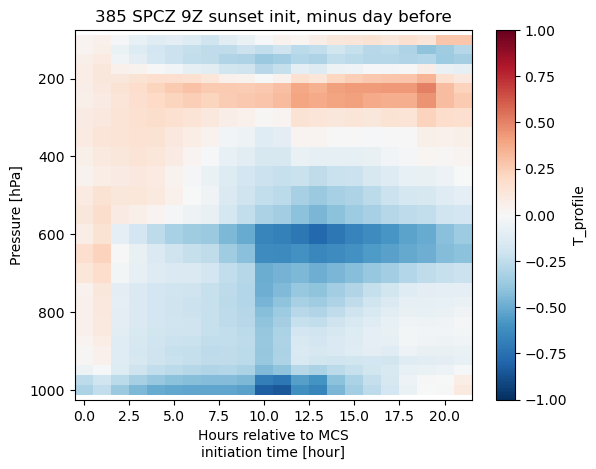

In [320]:
# Difference from day before's diurnal evolution
(SPCZ_Tprof[:,23:45,:] - SPCZ_Tprof[:,1:23,:].values ).mean(dim='n').transpose().\
        plot(ylim=[1025,75], vmin=-1, vmax=1, cmap='RdBu_r')
plt.title(str(SPCZ_Tprof.n.max().values)+' SPCZ 9Z sunset init, minus day before')

In [324]:
dfA =pd.DataFrame( [\
    (ds.Year_init[Amz_23Z]*10000 +\
    ds.Month_init[Amz_23Z]*100 +\
    ds.Day_init[Amz_23Z] +\
    ds.Hour_init[Amz_23Z]/100).values, \
    ds.Lat_init[Amz_23Z].values, \
    ds.Lon_init[Amz_23Z].values ]).transpose()
dfA

,0,1,2
0,20010104.23,-0.981147,-54.668034
1,20010108.23,-11.683846,-48.737690
2,20010125.23,-7.983333,-53.861111
3,20010224.23,-17.338890,-48.908333
4,20010317.23,-0.135294,-64.329407
...,...,...,...
243,20200517.23,-0.322093,-61.840691
244,20200518.23,-3.340556,-53.402225
245,20200529.23,-5.438889,-56.016670
246,20201010.23,-5.636517,-47.320786


# 

In [243]:
# Dates and times and lat and lon of initiation - SPCZ cases
dfS =pd.DataFrame( [\
    (ds.Year_init[SPCZ2014_18_9Z]*10000 +\
    ds.Month_init[SPCZ2014_18_9Z]*100 +\
    ds.Day_init[SPCZ2014_18_9Z] +\
    ds.Hour_init[SPCZ2014_18_9Z]/100).values, \
    ds.Lat_init[SPCZ2014_18_9Z].values, \
    ds.Lon_init[SPCZ2014_18_9Z].values ]).transpose()
dfS

,0,1,2
0,20140111.09,-12.915790,-159.760529
1,20140207.09,-16.926922,-169.419220
2,20140218.09,-12.668750,-171.975006
3,20140303.09,-8.442307,-169.926926
4,20140304.09,-16.036665,-176.303329
...,...,...,...
92,20181023.09,-17.453508,-163.290359
93,20181030.09,-18.960001,-173.350006
94,20181121.09,-15.571239,-157.932297
95,20181130.09,-5.582608,-177.967392


In [6]:
sat = xr.open_dataset('https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat_agg/GridSat_B1_Aggregation_best.ncd')

In [7]:
sat

<xarray.Dataset>
Dimensions:        (lat: 2000, lon: 5143, sparse2ir: 2, sparse2wv: 2,
                    sparse2vs: 2, sparse3ir: 761105, time: 94797,
                    time1: 127795, time_1: 1, Ngeo: 5)
Coordinates:
  * lat            (lat) float32 -70.0 -69.93 -69.86 ... 69.79 69.86 69.93
  * lon            (lon) float32 -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
  * sparse2ir      (sparse2ir) int32 0 1
  * sparse2wv      (sparse2wv) int32 0 1
  * sparse2vs      (sparse2vs) int32 0 1
  * sparse3ir      (sparse3ir) int32 907527 907528 912669 ... 9259775 9259780
  * time           (time) datetime64[ns] 1980-02-09T09:00:00 ... 2023-09-30T2...
    time_run       (time) datetime64[ns] ...
  * time1          (time1) datetime64[ns] 1980-01-01 ... 2023-09-30T21:00:00
    time1_run      (time1) datetime64[ns] ...
Dimensions without coordinates: time_1, Ngeo
Data variables: (12/27)
    satlat         (time_1, Ngeo) float32 ...
    satlon         (time_1, Ngeo) float32 ...
    satrad         (time_1, Ngeo) float32 ...
    satname        (time_1, Ngeo) |S64 ...
    b1ufile        (time_1, Ngeo) |S64 ...
    b1file         (time_1, Ngeo) |S64 ...
    ...             ...
    vschn          (time1, lat, lon) float32 ...
    vschn_2        (time1, lat, lon) float32 ...
    satid_ir       (time1, lat, lon) float32 ...
    satid_wv       (time1, lat, lon) int8 ...
    satid_vs       (time1, lat, lon) int8 ...
    irwin_vza_adj  (time1, lat, lon) float32 ...
Attributes: (12/56)
    title:                      GridSat-B1 - Gridded Satellite (GridSat) ISCC...
    summary:                    Geostationary data are remapped to equal angl...
    Conventions:                CF-1.4
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    references:                 http://dx.doi.org/10.1175/2011BAMS3039.1  htt...
    source:                     ISCCP.B1U.a.GOE-16.2023.09.30.1750.NOA,ISCCP....
    ...                         ...
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    featureType:                GRID
    location:                   Proto fmrc:GridSat_B1_Aggregation
    history:                    FMRC Best Dataset
    DODS.strlen:                50
    DODS.dimName:               StrLen

In [8]:
IR = sat.irwin_cdr

In [31]:
IR

<xarray.DataArray 'irwin_cdr' (time1: 127795, lat: 2000, lon: 5143)>
[1314499370000 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 -70.0 -69.93 -69.86 -69.79 ... 69.79 69.86 69.93
  * lon        (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.8 179.9 179.9
  * time1      (time1) datetime64[ns] 1980-01-01 ... 2023-09-30T21:00:00
    time1_run  (time1) datetime64[ns] ...
Attributes:
    units:              Kelvin
    long_name:          NOAA FCDR of Brightness Temperature near 11 microns (...
    standard_name:      toa_brightness_temperature
    comment:            Nadir-most observations
    Note_A:             Calibration correction of Kanpp (2007) not applied
    Note_B:             The IRWIN_CDR data have been View Zenith corrected us...
    intergeo_cal_flag:  0
    _ChunkSizes:        [   1 2000 5143]

#### Let's quicklook at images from SPCZ MCSs 

SPCZ_9Z = (ds.Lon_init < -140) & (ds.Lon_init > -160) & \
             (ds.Lat_init > -20) & (ds.Lat_init < 0) & \
             (ds.Hour_init== 9) # & (ds.TotalRain < 2e7) 

#### Problem: longitude < -180 gets clipped so had to make -160 the limit. 

In [57]:
from datetime import datetime
from datetime import timedelta

hourdelta = timedelta(hours=1)
YEARDELTA = timedelta(days=365)  # for dummy dataset not MCS-conditional

In [35]:
# How many cases are there? 144, not as many as 242 wanted 
# ds.Lat_init[SPCZ_9Z]

In [32]:
i=3
init = datetime(int(ds.Year_init[SPCZ_9Z][i].values), int(ds.Month_init[SPCZ_9Z][i].values), \
                int(ds.Day_init[SPCZ_9Z][i].values) , int(ds.Hour_init[SPCZ_9Z][i].values))
init

datetime.datetime(2001, 4, 13, 9, 0)

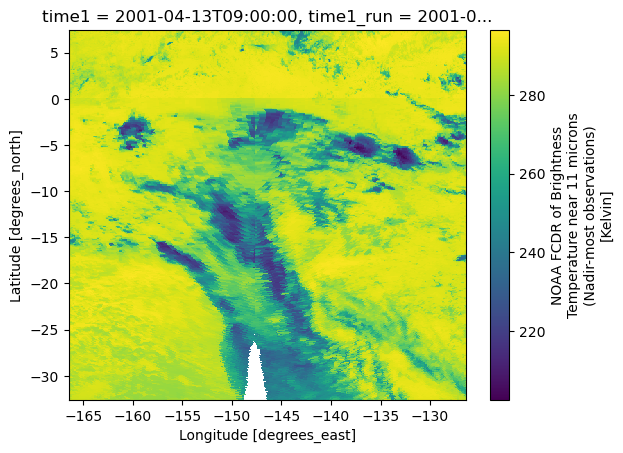

In [33]:
img = IR.sel(time1 = slice(init, init+hourdelta), \
             lat=slice(ds.Lat_init[SPCZ_9Z][i].values-20,ds.Lat_init[SPCZ_9Z][i].values+20), \
             lon=slice(ds.Lon_init[SPCZ_9Z][i].values-20,ds.Lon_init[SPCZ_9Z][i].values+20) )
img.plot()

In [47]:
# Fetch all the images 12 hours before each case (MCS initiation) 

# I only want 242, to match the Amazon case numbers exactly
SPCZ_lat = ds.Lat_init[SPCZ_9Z][0:241]
SPCZ_lon = ds.Lon_init[SPCZ_9Z][0:241]

# Loop in reversed order, recent to older

for i in reversed( range(len(SPCZ_lat)) ): 
    init= datetime(int(ds.Year_init[SPCZ_9Z][i].values), int(ds.Month_init[SPCZ_9Z][i].values), \
                   int(ds.Day_init[SPCZ_9Z][i].values) , int(ds.Hour_init[SPCZ_9Z][i].values))
    print(i,' out of ', len(SPCZ_lat), str(init))
    
    # -12 leads to 5 time levels
    imgs = IR.sel(time1 = slice(init-12*hourdelta, init+hourdelta), \
             lat=slice(SPCZ_lat[i]-20,SPCZ_lat[i]+20), \
             lon=slice(SPCZ_lon[i]-20,SPCZ_lon[i]+20) )
    ifname = '~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_'+\
                    str(init)[0:10]+'_12hleadup.nc'
    print('writing file ', ifname)
    imgs.to_netcdf(ifname)

143  out of  144 2020-07-15 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2020-07-15_12hleadup.nc
142  out of  144 2020-07-06 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2020-07-06_12hleadup.nc
141  out of  144 2020-04-17 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2020-04-17_12hleadup.nc
140  out of  144 2020-03-31 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2020-03-31_12hleadup.nc
139  out of  144 2019-05-08 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2019-05-08_12hleadup.nc
138  out of  144 2019-03-24 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2019-03-24_12hleadup.nc
137  out of  144 2019-03-06 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2019-03-06_12hleadup.nc
136  out of  144 2018-11-21 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_

Error:curl error: Timeout was reached
Error:DAP DATADDS packet is apparently too short


34  out of  144 2005-07-13 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2005-07-13_12hleadup.nc
33  out of  144 2005-05-11 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2005-05-11_12hleadup.nc
32  out of  144 2005-05-07 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2005-05-07_12hleadup.nc
31  out of  144 2005-03-26 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2005-03-26_12hleadup.nc
30  out of  144 2005-03-06 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2005-03-06_12hleadup.nc
29  out of  144 2005-02-27 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2005-02-27_12hleadup.nc
28  out of  144 2005-02-11 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2005-02-11_12hleadup.nc
27  out of  144 2004-12-12 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2004-12-

In [60]:
# Fetch all the images ONE YEAR AND 12 hours before each case (MCS initiation) 

# Loop in reversed order, recent to older

for i in reversed( range(len(SPCZ_lat)) ): 
    init= datetime(int(ds.Year_init[SPCZ_9Z][i].values), int(ds.Month_init[SPCZ_9Z][i].values), \
                   int(ds.Day_init[SPCZ_9Z][i].values) , int(ds.Hour_init[SPCZ_9Z][i].values))
    print(i,' out of ', len(SPCZ_lat), str(init))
    
    # -12 leads to 5 time levels
    try: 
        imgs = IR.sel(time1 = slice(init-12*hourdelta+YEARDELTA, init+hourdelta+YEARDELTA), \
             lat=slice(SPCZ_lat[i]-20,SPCZ_lat[i]+20), \
             lon=slice(SPCZ_lon[i]-20,SPCZ_lon[i]+20) )
        ifname = '~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_'+\
                    str(init)[0:10]+'_12hleadup+YEAR.nc'
        print('writing file ', ifname)
        imgs.to_netcdf(ifname)
    except: 
        print('case from end of dataset? trying again')

143  out of  144 2020-07-15 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2020-07-15_12hleadup+YEAR.nc
142  out of  144 2020-07-06 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2020-07-06_12hleadup+YEAR.nc
141  out of  144 2020-04-17 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2020-04-17_12hleadup+YEAR.nc
140  out of  144 2020-03-31 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2020-03-31_12hleadup+YEAR.nc
139  out of  144 2019-05-08 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2019-05-08_12hleadup+YEAR.nc
138  out of  144 2019-03-24 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2019-03-24_12hleadup+YEAR.nc
137  out of  144 2019-03-06 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2019-03-06_12hleadup+YEAR.nc
136  out of  144 2018-11-21 09:00:00
writing file  ~/Box/Evolutionary

Error:DAP DATADDS packet is apparently too short


100  out of  144 2015-02-28 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2015-02-28_12hleadup+YEAR.nc
99  out of  144 2015-01-26 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2015-01-26_12hleadup+YEAR.nc
98  out of  144 2014-11-17 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2014-11-17_12hleadup+YEAR.nc
97  out of  144 2014-06-24 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2014-06-24_12hleadup+YEAR.nc
96  out of  144 2014-04-17 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2014-04-17_12hleadup+YEAR.nc
95  out of  144 2014-04-06 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2014-04-06_12hleadup+YEAR.nc
94  out of  144 2014-01-11 09:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/SPCZ_09Z_2014-01-11_12hleadup+YEAR.nc
93  out of  144 2013-12-23 09:00:00
writing file  ~/Box/EvolutionaryConvect

In [65]:
Amz_23Z

<xarray.DataArray (n: 197152)>
array([False, False, False, ..., False, False, False])
Dimensions without coordinates: n

In [66]:
# Fetch all the images ONE YEAR AND 12 hours before each case (MCS initiation) - AMAZON

Amz_lat = ds.Lat_init[Amz_23Z][0:241]
Amz_lon = ds.Lon_init[Amz_23Z][0:241]

# Loop in reversed order, recent to older

for i in reversed( range(len(Amz_lat)) ): 
    init= datetime(int(ds.Year_init[Amz_23Z][i].values), int(ds.Month_init[Amz_23Z][i].values), \
                   int(ds.Day_init[Amz_23Z][i].values) , int(ds.Hour_init[Amz_23Z][i].values))
    print(i,' out of ', len(Amz_lat), str(init))
    
    # -12 leads to 5 time levels
    try: 
        imgs = IR.sel(time1 = slice(init-12*hourdelta+YEARDELTA, init+hourdelta+YEARDELTA), \
             lat=slice(Amz_lat[i]-20,Amz_lat[i]+20), \
             lon=slice(Amz_lon[i]-20,Amz_lon[i]+20) )
        ifname = '~/Box/EvolutionaryConvection/Gridsat_images/Amz_23Z_'+\
                    str(init)[0:10]+'_12hleadup+YEAR.nc'
        print('writing file ', ifname)
        imgs.to_netcdf(ifname)
    except: 
        print('case from end of dataset? trying again')

240  out of  241 2020-01-19 23:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/Amz_23Z_2020-01-19_12hleadup+YEAR.nc
239  out of  241 2020-01-17 23:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/Amz_23Z_2020-01-17_12hleadup+YEAR.nc
238  out of  241 2020-01-12 23:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/Amz_23Z_2020-01-12_12hleadup+YEAR.nc
237  out of  241 2019-12-25 23:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/Amz_23Z_2019-12-25_12hleadup+YEAR.nc
236  out of  241 2019-12-13 23:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/Amz_23Z_2019-12-13_12hleadup+YEAR.nc
235  out of  241 2019-10-24 23:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/Amz_23Z_2019-10-24_12hleadup+YEAR.nc
234  out of  241 2019-06-19 23:00:00
writing file  ~/Box/EvolutionaryConvection/Gridsat_images/Amz_23Z_2019-06-19_12hleadup+YEAR.nc
233  out of  241 2019-06-08 23:00:00
writing file  ~/Box/EvolutionaryConvect

<xarray.DataArray 'Lat_init' (n: 144)>
array([ -8.705932,  -7.101924, -13.310528, -12.564285, -17.467648,  -8.195715,
       -12.792   , -11.049999,  -7.847753,  -8.553846, -13.779631, -15.115591,
       -17.2078  , -10.527778, -13.588183,  -9.781707, -16.948149, -10.972537,
       -15.165385, -12.717999, -11.650001, -10.363433, -15.431818,  -8.494767,
       -12.757691, -13.565888, -18.133507, -10.319813, -14.864707,  -8.874435,
       -15.695   ,  -7.907091, -13.960526, -13.661112, -11.      , -17.797058,
       -10.95822 , -10.890719,  -9.683333, -12.749998, -10.577272, -17.68    ,
       -14.039037,  -8.587085,  -5.884782, -12.743022, -11.385294, -17.517124,
       -14.777381, -10.65055 ,  -9.521999, -13.255882, -13.917124,  -9.227777,
       -17.91    ,  -7.559615,  -9.206522,  -4.695   , -19.231077, -12.1     ,
       -14.715734,  -8.983334,  -7.383333,  -7.240475, -10.402942,  -7.509016,
        -8.895333,  -1.948276,  -3.152325, -12.787931, -10.534409,  -9.835186,
        -9.910001,  -9.578205,  -1.481579, -12.234375, -13.01087 ,  -9.564584,
       -13.765575, -10.589395, -13.136957, -14.413748, -16.403334, -12.135714,
        -8.070454, -17.774614,  -4.8308  , -18.540907, -10.473078, -10.456944,
        -8.676667, -12.691176,  -9.721429,  -9.150001, -12.91579 , -10.698572,
       -18.256062, -13.976417,  -8.70128 , -16.358942, -17.059677,  -8.698148,
        -9.48913 ,  -6.307143,  -4.895638,  -2.633582, -10.114408,  -4.960001,
        -1.898696, -16.678568,  -9.522024,  -3.794444,  -9.315216, -11.29    ,
       -15.34375 , -17.071741, -14.25    , -11.614286, -15.113159, -12.331944,
       -11.512161, -19.071737, -14.016196, -11.767334, -11.176666, -10.625   ,
        -7.666667,  -8.57258 , -11.842307,  -3.0625  ,  -6.354762,  -5.542858,
       -12.592856, -15.086363, -12.833333,  -4.254545, -15.571239, -11.211538,
        -4.35    ,  -2.608333,  -3.115217, -10.51    ,  -3.602941, -15.736667])
Dimensions without coordinates: n

In [40]:
IR.sel(time1 = slice(init-12*hourdelta, init+hourdelta), \
             lat=slice(SPCZ_lat[i]-20,SPCZ_lat[i]+20), \
             lon=slice(SPCZ_lon[i]-20,SPCZ_lon[i]+20) )

<xarray.DataArray 'irwin_cdr' (time1: 5, lat: 572, lon: 572)>
[1635920 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 -28.7 -28.63 -28.56 -28.49 ... 11.13 11.2 11.27
  * lon        (lon) float32 -175.4 -175.4 -175.3 ... -135.6 -135.6 -135.5
  * time1      (time1) datetime64[ns] 2001-02-15T21:00:00 ... 2001-02-16T09:0...
    time1_run  (time1) datetime64[ns] ...
Attributes:
    units:              Kelvin
    long_name:          NOAA FCDR of Brightness Temperature near 11 microns (...
    standard_name:      toa_brightness_temperature
    comment:            Nadir-most observations
    Note_A:             Calibration correction of Kanpp (2007) not applied
    Note_B:             The IRWIN_CDR data have been View Zenith corrected us...
    intergeo_cal_flag:  0
    _ChunkSizes:        [   1 2000 5143]

In [347]:
# Multipage pdf of the images 
# https://stackoverflow.com/questions/38938454/efficient-multipage-pdf-creation-using-matplotlib-subplots-in-python

    import sys
    import matplotlib
    from matplotlib.backends.backend_pdf import PdfPages

    matplotlib.rcParams.update({"font.size": 6})

    # Dimensions for any m-rows × n-cols array of subplots / pg.
    m, n = 3, 2

    # Don't forget to indent after the with statement
    with PdfPages("AmzMCS_images.pdf") as pdf:

        """Before beginning the iteration through all the data,
        initialize the layout for the plots and create a
        representation of the subplots that can be easily
        iterated over for knowing when to create the next page
        (and also for custom settings like partial axes labels)"""
        f, axarr = plt.subplots(m, n, sharex="col", sharey="row")
        arr_ij = [(x, y) for x, y in np.ndindex(axarr.shape)]
        subplots = [axarr[index] for index in arr_ij]

        # To conserve needed plotting real estate,
        # only label the bottom row and leftmost subplots
        # as determined automatically using m and n
        splot_index = 0
        for s, splot in enumerate(subplots):
            splot.set_ylim(0, 0.15)
            splot.set_xlim(0, 50)
            last_row = m * n - s < n + 1
            first_in_row = s % n == 0
            if last_row:
                splot.set_xlabel("Longitude")
            if first_in_row:
                splot.set_ylabel("Latitude")

        # Iterate through each sample in the data
        for i in range(6):
            img = IR.sel(time1 = init+hourdelta*(3*i+1), \
                        lat=slice(ds.Lat_init[Amz_23Z][i].values-20,ds.Lat_init[Amz_23Z][i].values+20), \
                        lon=slice(ds.Lon_init[Amz_23Z][i].values-20,ds.Lon_init[Amz_23Z][i].values+20) )
            img.plot(subplot_kws : dict) 
            subplots[splot_index].pcolormesh(img)
            splot_index += 1

            """Once an mxn number of subplots have been collected 
            you now have a full page's worth, and it's time to 
            close and save to pdf that page and re-initialize for a
            new page possibly. We can basically repeat the same 
            exact code block used for the first layout 
            initialization, but with the addition of 3 new lines:
             +2 for creating & saving the just-finished pdf page,
             +1 more to reset the subplot index (back to zero)"""
            if splot_index == m * n:
                pdf.savefig()
                plt.close(f)
                f, axarr = plt.subplots(m, n, sharex="col", sharey="row")
                arr_ij = [(x, y) for x, y in np.ndindex(axarr.shape)]
                subplots = [axarr[index] for index in arr_ij]
                splot_index = 0
                for s, splot in enumerate(subplots):
                    splot.set_ylim(0, 0.15)
                    splot.set_xlim(0, 50)
                    last_row = (m * n) - s < n + 1
                    first_in_row = s % n == 0
                    if last_row:
                        splot.set_xlabel("X-axis label")
                    if first_in_row:
                        splot.set_ylabel("Y-axis label")

        # Done!
        # But don't forget to save to pdf after the last page    
        pdf.savefig()
        plt.close(f)

In [352]:
img.plot?

Signature:     
img.plot(
    *,
    row: 'Hashable | None' = None,
    col: 'Hashable | None' = None,
    col_wrap: 'int | None' = None,
    ax: 'Axes | None' = None,
    hue: 'Hashable | None' = None,
    subplot_kws: 'dict[str, Any] | None' = None,
    **kwargs: 'Any',
) -> 'Any'
Type:           DataArrayPlotAccessor
String form:    <xarray.plot.accessor.DataArrayPlotAccessor object at 0x28d1cc1c0>
File:           ~/miniconda3/lib/python3.10/site-packages/xarray/plot/accessor.py
Docstring:     
Default plot of DataArray using :py:mod:`matplotlib:matplotlib.pyplot`.

Calls xarray plotting function based on the dimensions of
the squeezed DataArray.

=============== ===========================
Dimensions      Plotting function
=============== ===========================
1               :py:func:`xarray.plot.line`
2               :py:func:`xarray.plot.pcolormesh`
Anything else   :py:func:`xarray.plot.hist`
=============== ===========================

Parameters
----------
darray : DataA

In [350]:
subplots[splot_index].pcolormesh(img)

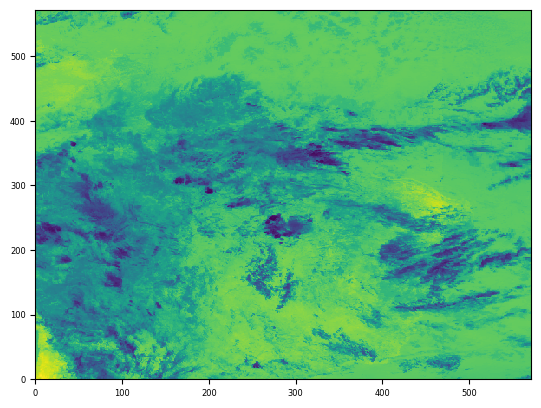

In [351]:
plt.pcolormesh(img)

# OLD STUFF - regression sandbox

In [21]:
MCSs['Total Rain'].rename('Rain_total', inplace=True)

0         5.885243e+06
1         1.656512e+07
2         1.690734e+06
3         1.356897e+06
4         7.065332e+06
              ...     
197147    2.914125e+06
197148    3.550953e+06
197149    9.760113e+05
197150    6.164257e+05
197151    8.885798e+05
Name: Rain_total, Length: 197152, dtype: float64

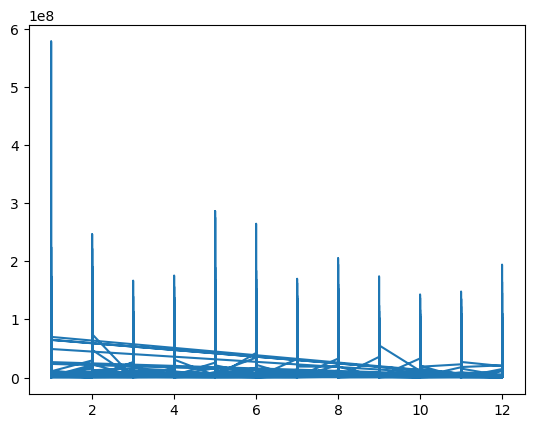

In [17]:
plt.plot( MCSs.Month_init, MCSs['Total Rain'] )

### ChatGPT wrote this initially
from the prompt: "I have a Pandas dataframe with several columns of data. Each column has many values, over 150000 values. Could you please provide a Python code for creating a regression model which explains the variance in one column using the data from other columns. Please include a model selection step, to create the most skillful regression model while avoiding overfitting. "

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score as r2score

In [52]:
# Split features (X) and target column (y)

data = MCSs[ ['CAPE','TCWV','Total Rain','Lon_init','Lat_init'] ].copy().dropna()

X = data.drop(columns=['Total Rain'])
y = data['Total Rain']

In [53]:
# Make training vs. testing subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression vs. Random forest 

In [43]:
# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation and get mean squared error scores
linear_scores = cross_val_score(linear_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_scores = cross_val_score(rf_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean of scores (negate them to get positive values)
linear_rmse_scores = -linear_scores
rf_rmse_scores = -rf_scores

# Print mean RMSE scores for both models
print("Linear Regression Mean RMSE:", linear_rmse_scores.mean())
print("Random Forest Regression Mean RMSE:", rf_rmse_scores.mean())


Linear Regression Mean RMSE: 69833472341043.81
Random Forest Regression Mean RMSE: 78884072774781.17


In [48]:
linear_rmse_scores.mean()/rf_rmse_scores.mean()

0.8852670746403095

# Linear regression, different numbers of predictors 

In [66]:
from itertools import combinations

# List of possible candidate predictors (replace with your actual column names)
candidate_predictors = ['CAPE', 'TCWV', 'Lat_init', 'Lon_init']

# Splitting the data as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list to store results
results = []

# Loop through different numbers of features
for num_features in range(1, len(candidate_predictors) + 1):
    # Generate combinations of candidate predictors
    feature_combinations = list(combinations(candidate_predictors, num_features))
    
    for features in feature_combinations:
        # Subset the training and testing data with the selected features
        X_train_subset = X_train[list(features)]
        X_test_subset = X_test[list(features)]
        
        # Initialize and train a linear regression model
        model = LinearRegression()
        model.fit(X_train_subset, y_train)
        
        # Make predictions on the testing set
        y_pred = model.predict(X_test_subset)
        
        # Calculate RMSE and store results
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2score(y_test, y_pred)

        results.append({
            'Features': features,
            'Num_Features': num_features,
            'RMSE': rmse,
            'R2_percent_explained': r2*100
        })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)


# Display the results
results_df.sort_values('R2_percent_explained', ascending=False)

,Features,Num_Features,RMSE,R2_percent_explained
14,"(CAPE, TCWV, Lat_init, Lon_init)",4,8.018295e+06,1.811232
11,"(CAPE, TCWV, Lon_init)",3,8.019135e+06,1.790631
10,"(CAPE, TCWV, Lat_init)",3,8.023716e+06,1.678498
4,"(CAPE, TCWV)",2,8.025041e+06,1.646007
13,"(TCWV, Lat_init, Lon_init)",3,8.025736e+06,1.628824
8,"(TCWV, Lon_init)",2,8.026358e+06,1.613540
7,"(TCWV, Lat_init)",2,8.032771e+06,1.456397
1,"(TCWV,)",1,8.033851e+06,1.429872
12,"(CAPE, Lat_init, Lon_init)",3,8.067180e+06,0.611131
5,"(CAPE, Lat_init)",2,8.067621e+06,0.600278


In [68]:
import numpy as np 

xaxis = np.linspace(-35000.,35000,71)
yaxis = xaxis
xx, yy = np.meshgrid(xaxis, yaxis)

In [69]:
xx.shape

(71, 71)

In [72]:
(xx*0).shape

(71, 71)

In [74]:
xx.max()


35000.0